In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# A1. Exploring Smartcard Types

In [2]:
df = pd.read_csv("monthly_smartcard_replacements.csv")
df

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07,Replace Smartcard,Photo Identification Card,Merged,1


**1. How many different (unique) smartcard types are recorded in the
‘Smartcard.Type’ column? What are those different smartcard types and how
many instances are recorded for each type?**

In [3]:
#count the occurrences of each unique value in the "Smartcard.Type" column, and store it into a variable.
unique_smartcard_types = df['Smartcard.Type'].value_counts()
#print the variable
unique_smartcard_types

Driver Licence Card          1896
Photo Identification Card    1631
Industry Authority Card      1218
Marine Licence Ind Card      1047
Name: Smartcard.Type, dtype: int64

So there are **4** different smartcard types and the instances of each type are written above.

**2. Plot a barchart of the smartcard types with the bars showing the count of each
smartcard type. Which smartcard type is replaced the most?**

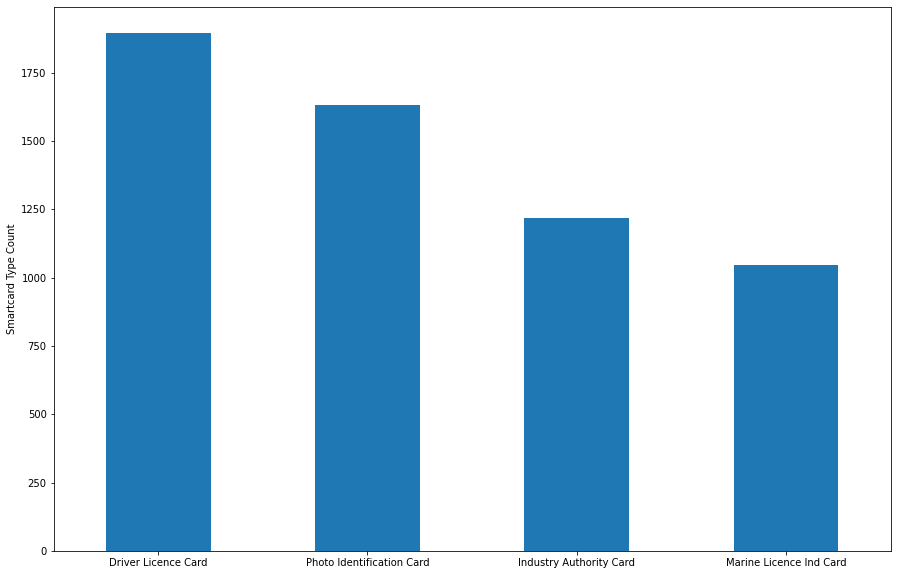

In [4]:
# Make the figure size of the plot to 15 units in width and 10 units in height
plt.figure(figsize=(15, 10))

# Using the 'plot' method on "unique_smartcard_types" to create a bar plot
# 'kind='bar' makes it so that a bar plot is created
unique_smartcard_types.plot(kind='bar')

# Setting the x-axis labels to be displayed horizontally 
plt.xticks(rotation=0)

# Add a label to the y-axis
plt.ylabel('Smartcard Type Count')

# Display the plot
plt.show()

From the bar graph, we can see that the **"Driver Licence Card"** Smartcard Type is replaced the most. 

**3. Calculate the percentage of records for each smartcard type.**

In [5]:
#Calculate the percentage of each smartcard type in "unique_smartcard_types"
smartcard_type_percentage = ( unique_smartcard_types /len(df)) * 100

**So, the percentage of records for each smartcard type is:**

In [6]:
#display the resulting percentages
smartcard_type_percentage

Driver Licence Card          32.734807
Photo Identification Card    28.159530
Industry Authority Card      21.029006
Marine Licence Ind Card      18.076657
Name: Smartcard.Type, dtype: float64

# A2. Exploring Reasons for Smartcard Replacement

**1. Convert data type of column ‘Month’ to a datetime format.
Hint: Use pandas.to_datetime function to convert the type of ‘Month’ column to a
datetime format as shown in one of your applied sessions.**

In [7]:
#Use the pd.to_datetime() function to convert the 'Month' column in the DataFrame 'df' to a datetime format.
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1


**2. What are the different reasons for smartcard replacements in the given data and
how many instances are observed for each reason? Hint: Check the
'Action.Reason' column.**

In [8]:
#count the occurrences of each unique value in the "Action.Reason" column, and store it into a variable.
count_action_reason = df['Action.Reason'].value_counts()
count_action_reason

Lost                                       539
Managers Approval                          532
Change Customer Details                    521
Lost In Mail - Imu                         519
Stolen                                     471
Destroyed                                  379
Condition Change                           364
Faulty                                     344
Damaged                                    342
Product Exists Othr Surrend Void Cancel    321
Facial Image Is Not A True Likeness        304
Transition Laminate To Smartcard           256
Merged                                     200
Court Order Issued X3 Or X4 Condition      137
Da/dgd Smartcard Replacement Fee Exempt    134
Expired                                    133
Marine Licence Transition                  132
Defective                                   88
Disaster Relief                             48
Remove Gender From Smartcard                28
Name: Action.Reason, dtype: int64

**3. What is the total number of months in which 100 or more smartcard
replacements are reported due to being "Faulty"?**

In [9]:
# Create a new DataFrame 'faulty_action' by filtering rows where the 'Action.Reason' column has the value 'Faulty'
faulty_action = df[df['Action.Reason'] == 'Faulty']

# Group the 'faulty_action' DataFrame by the 'Month' column, and then calculate the sum of 'Number.of.transactions' for each of the months
faulty_by_month = faulty_action.groupby('Month')['Number.of.transactions'].sum()

#filter 'faulty_by_month' to include only months with 100 or more "faulty" transactions
months_with_100_or_more = faulty_by_month[faulty_by_month >= 100]

# Count the number of months in the 'months_with_100_or_more' series by calculating the length of it
number_of_months = len(months_with_100_or_more)

# Display the total number of months in which 100 or more smartcard replacements are reported due to being Faulty
print("total number of months in which 100 or more smartcard replacements are reported due to being Faulty: ", number_of_months)

total number of months in which 100 or more smartcard replacements are reported due to being Faulty:  57


# A3. Investigating Annual Smartcard Replacements

**1. Create a new column named 'Year' extracting the year from the 'Month' column.**

In [10]:
#the .dt.year accessor extracts the year value from the datetime values in the 'Month' column.
df['Year'] = df['Month'].dt.year
df

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


**2. Create a line plot showing the total number of annual smartcard replacements
(number of transactions) against year.**


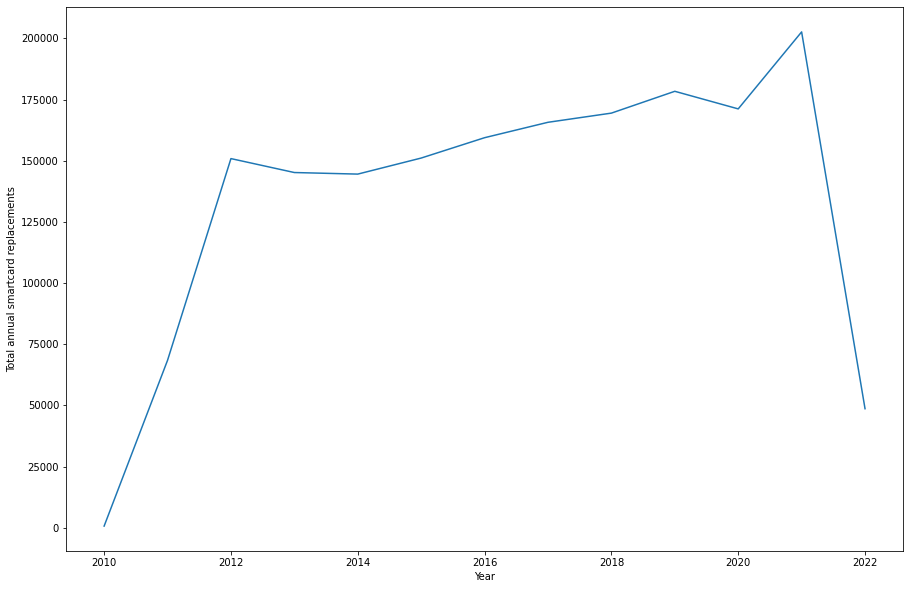

In [11]:
# Make the figure size for the plot to 15 units in width and 10 units in height
plt.figure(figsize=(15, 10))

# Group the DataFrame 'df' by the 'Year' column and calculate the sum of 'Number.of.transactions' for each of the years
no_annual_replacements = df.groupby('Year')['Number.of.transactions'].sum()

# Create a line plot using the 'plot' method on 'no_annual_replacements' 
# 'kind='line' makes it so that a line plot is created
no_annual_replacements.plot(kind='line')

# Add a label to the x-axis
plt.xlabel('Year')

# Add a label to the y-axis
plt.ylabel('Total annual smartcard replacements')

# Display the plot
plt.show()

**3. Explain the trend as observed from the chart. Are there any years that are
different from others and if so, what is the reason behind it?**

In [12]:
no_annual_replacements

Year
2010       671
2011     68418
2012    150886
2013    145192
2014    144549
2015    151109
2016    159427
2017    165726
2018    169477
2019    178395
2020    171206
2021    202671
2022     48648
Name: Number.of.transactions, dtype: int64

Yes, there are years that are different from others. Starting from:

**2010**: This year only had 671 Total Smartcard Transactions. This would indicate that Smartcards were still in their beginning stages/newly introduced in the transportation system and perhaps not used by many commuters back then.

**2011**: We can see a huge increase of Total Smartcard Transactions in 2011, this shows that more people began to adopt the smartcard system and as a result, more people means that there will be much more Smartcard Transactions.

**2012-2019**: We can see the Total number of Smartcard Transactions keep increasing from 2012-2019, this indicates that the smartcard system is popularized and keeps improving every year. The consistency in the numbers also show that the Smartcard Systems became an essential part of commuting in queensland.

**2020**: The impact of the COVID-19 pandemic likely affected with the reduction in replacements in 2020. Lockdowns and COVID limitations likely led to fewer smartcard replacements as total utilizations were lower.

**2021**: The rapid rise of transactions in 2021 could be from the improvements/upgrades of the overall smartcard systems, and especially after the COVID limitations started getting lighter, the transportation department may have gotten a sudden surge of demands from many people who worked from home during the lockdown and had to go back commuting to the office. 

**2022**: The sudden drop of transactions could mean that the smartcard systems have been improved so well that the majority of people no longer experience technical/system issues. The rise of other forms of transportation like Uber, or other ride sharing apps could also affect these numbers as it would be more convenient for longer distances for some people.  

# A4. Investigating Reasons for Smartcard Replacement 

**1. Plot a barchart to display the total number of transactions for each
'Action.Reason' using the available data.**

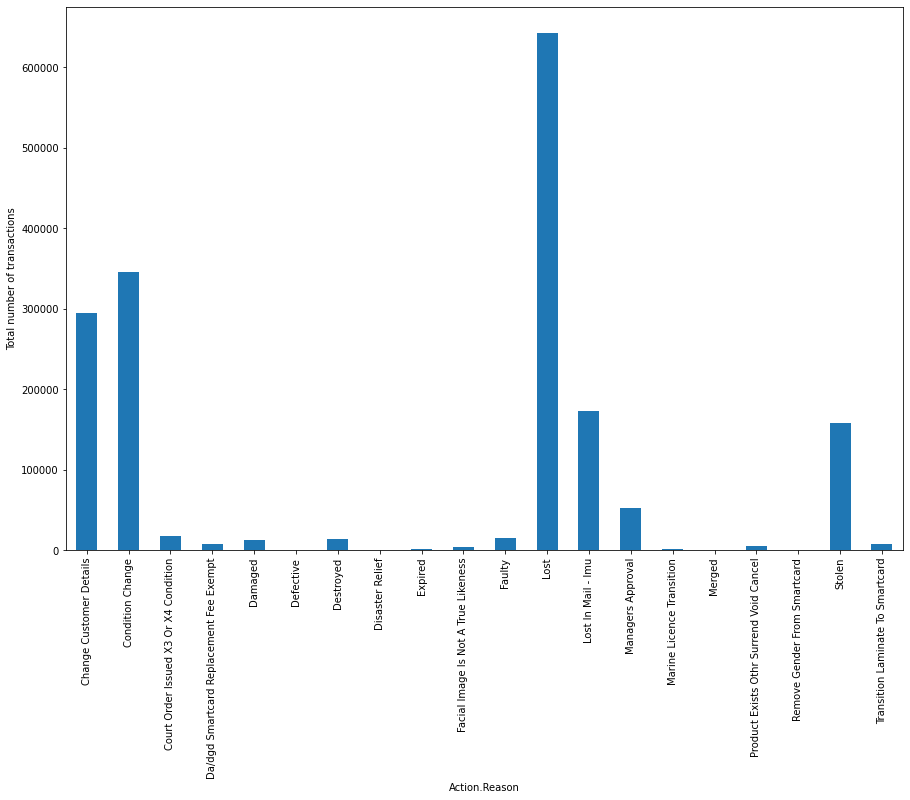

In [13]:
# Make the figure size for the plot to 15 units in width and 10 units in height
plt.figure(figsize=(15, 10))

# Group the DataFrame 'df' by the 'Action.Reason' column and calculate the sum of 'Number.of.transactions' for each action.reason
action_transactions = df.groupby('Action.Reason')['Number.of.transactions'].sum()

# Create a bar plot using the 'plot' method on 'action_transactions'
# kind='bar' specifies that a bar plot should be created
action_transactions.plot(kind='bar')

# Assign the x-label to the plot
plt.xlabel('Action.Reason')

# Assign the y-label to the plot
plt.ylabel('Total number of transactions')

# Display the plot
plt.show()

**2. What are the top three reasons for smartcard replacement?**

In [14]:
#Convert the series to a dataframe
action_transactions = action_transactions.to_frame()

# Select the top three largest total number of transactions of action.reason
# The 'nlargest()' function is used to return the top three largest rows based on the 'Number.of.transactions' column
top_three_reasons = action_transactions.nlargest(3, 'Number.of.transactions')

# Display the 'top_three_reasons' dataframe
top_three_reasons


,Number.of.transactions
Action.Reason,
Lost,642749
Condition Change,344905
Change Customer Details,294435


**The top three reasons for smartcard replacements are:**
1. Lost
2. Condition Change
3. Change Customer Details

**3. Total number of transactions of which 'Action.Reason' is between 1000 and
2000?**

In [15]:
# Filter the 'action_transactions' dataframe 
# Filters the 'Number.of.transactions' column values to retrieve rows with values between 1000 and 2000 
filtered_action_transactions = action_transactions[(action_transactions['Number.of.transactions'] >= 1000) & (action_transactions['Number.of.transactions'] <= 2000)]
filtered_action_transactions

,Number.of.transactions
Action.Reason,
Marine Licence Transition,1822


# A5. Investigating Reasons over Annual Smartcard Replacement

**1. Find out the annual number of transactions for each 'Action.Reason' across
different years for which data is available**

In [16]:
# Group the dataframe 'df' by 'Year' and 'Action.Reason', and find the sum of 'Number.of.transactions' for each combinations
annual_transaction_reason = df.groupby(['Year', 'Action.Reason'])['Number.of.transactions'].sum()

# Reset the index of the 'annual_transaction_reason' DataFrame
annual_transaction_reason = annual_transaction_reason.reset_index()

# Create a pivot table using the 'pivot' function
# The table will have 'Year' as columns, and 'Action.Reason' as index/rows, and 'Number.of.transactions' as values
the_table = annual_transaction_reason.pivot(columns='Year', values='Number.of.transactions', index='Action.Reason')

# Displaying the resulting pivot table
the_table


Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Action.Reason,,,,,,,,,,,,,
Change Customer Details,84.0,12265.0,28446.0,28603.0,28188.0,28267.0,27730.0,26837.0,27083.0,26856.0,24934.0,28593.0,6549.0
Condition Change,39.0,7408.0,18136.0,21262.0,23426.0,27316.0,33056.0,40274.0,41440.0,42143.0,38585.0,41637.0,10183.0
Court Order Issued X3 Or X4 Condition,7.0,1014.0,2085.0,2219.0,2244.0,1928.0,1634.0,1450.0,1145.0,1148.0,1085.0,1082.0,254.0
Da/dgd Smartcard Replacement Fee Exempt,3.0,3212.0,1118.0,215.0,224.0,262.0,299.0,385.0,438.0,527.0,554.0,651.0,124.0
Damaged,9.0,1660.0,2709.0,1685.0,1281.0,1096.0,1046.0,747.0,670.0,674.0,689.0,627.0,134.0
Defective,1.0,120.0,243.0,156.0,123.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destroyed,NaN,320.0,750.0,645.0,699.0,1025.0,1278.0,1402.0,1394.0,1612.0,1961.0,2563.0,744.0
Disaster Relief,NaN,18.0,4.0,123.0,2.0,7.0,NaN,27.0,8.0,80.0,NaN,NaN,44.0
Expired,NaN,3.0,7.0,16.0,13.0,36.0,45.0,78.0,92.0,154.0,227.0,902.0,455.0


**2. For each action reason determine the number of years during which the number
of annual transactions exceeds 10000.**

In [17]:
# Create an empty dictionary to store action reasons and their corresponding years
action_dict = {}

# Iterate through each action reason in the index/row of the table
for action_reason in the_table.index:
    # Create an empty list to store years for which annual transactions exceed 10000
    list_of_years = []
    
    # Iterate through each year in the columns of the pivot table
    for year in the_table.columns:
        # Check if the number of transactions for the action reason in the given year is greater than 10000
        if the_table.loc[action_reason, year] > 10000:
            # If it is, add the year to the list_of_years
            list_of_years.append(year)
    
    # Store the list of years in the action_dict with the action reason as the key
    action_dict[action_reason] = list_of_years

# Iterate through the action_dict to use information
for key, value in action_dict.items():
    # Count the number of years for which the condition is met
    year_count = len(value)
    # Print the action reason, corresponding years, and the total count of years
    print(f"{key} = {value}, in which there are {year_count} years in total during which the number of annual transactions exceeds 10000.\n")


Change Customer Details = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], in which there are 11 years in total during which the number of annual transactions exceeds 10000.

Condition Change = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], in which there are 11 years in total during which the number of annual transactions exceeds 10000.

Court Order Issued X3 Or X4 Condition = [], in which there are 0 years in total during which the number of annual transactions exceeds 10000.

Da/dgd Smartcard Replacement Fee Exempt = [], in which there are 0 years in total during which the number of annual transactions exceeds 10000.

Damaged = [], in which there are 0 years in total during which the number of annual transactions exceeds 10000.

Defective = [], in which there are 0 years in total during which the number of annual transactions exceeds 10000.

Destroyed = [], in which there are 0 years in total during which the number of annual transactions exce

**3. Which action reasons have at least one year where the number of annual
transactions exceeds 10000?**

In [18]:
# Create an empty list to store action reasons with at least one year 
at_least_one = []

# Iterate through each key-value pair in the action_dict dictionary
for key, value in action_dict.items():
    # Get the count of years for which the condition is met
    year_count = len(value)
    # Check if the year_count is greater than or equal to 1
    if year_count >= 1:
        # If condition is met, add the action reason to the at_least_one list
        at_least_one.append(key)

# Display the resulting list of action reasons
at_least_one


['Change Customer Details',
 'Condition Change',
 'Lost',
 'Lost In Mail - Imu',
 'Stolen']

Therefore, The action.reasons that have at least one year where the number of annual transactions exceeds 10000 are: **Change Customer Details,
 Condition Change,
 Lost,
 Lost In Mail - Imu,
 Stolen.**

**4. Create a histogram to analyse the distribution of the annual number of
transactions per action reason as calculated in A5.1. Explain any observations
and provide comments on the distribution.**

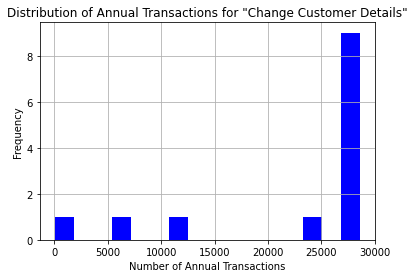

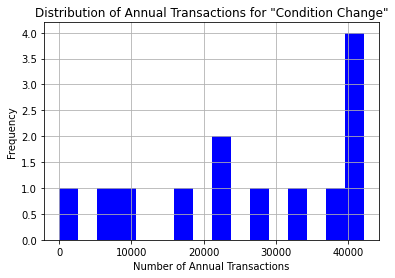

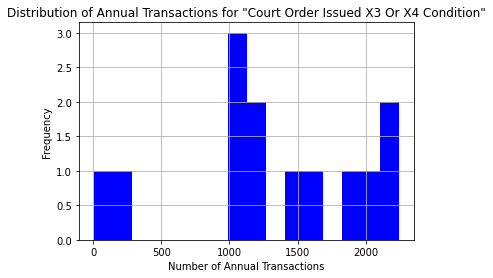

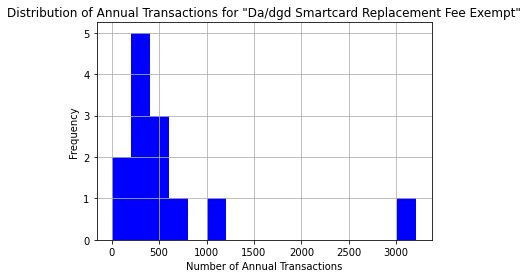

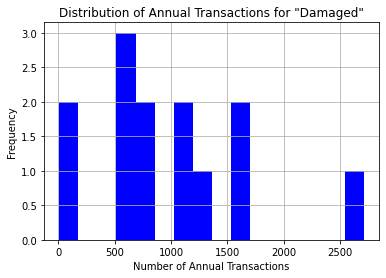

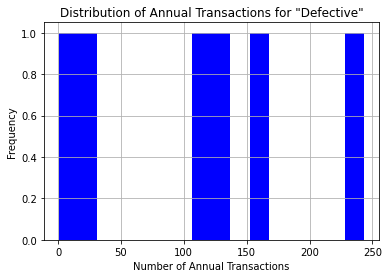

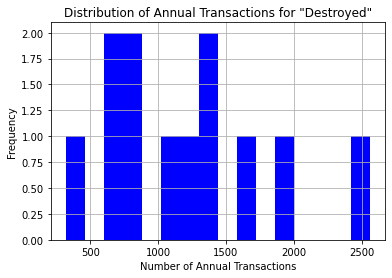

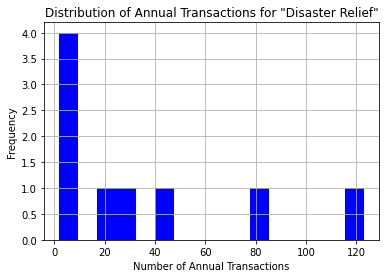

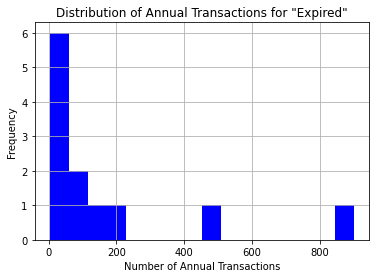

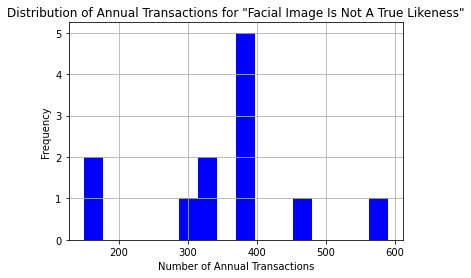

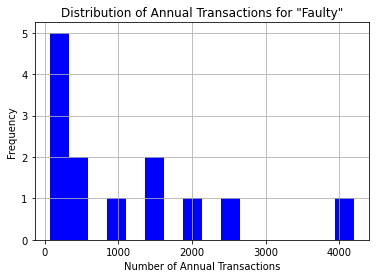

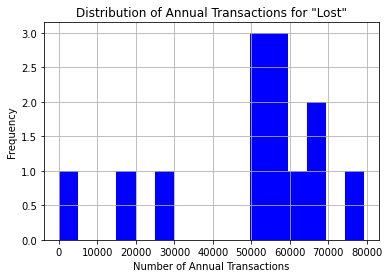

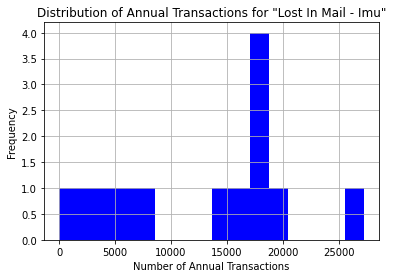

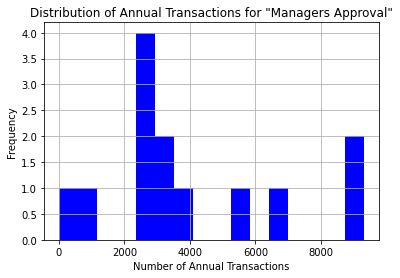

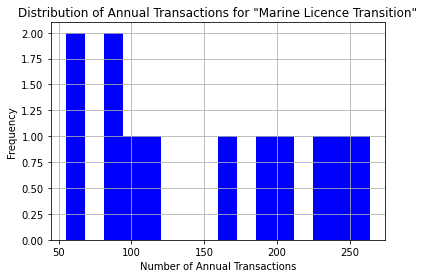

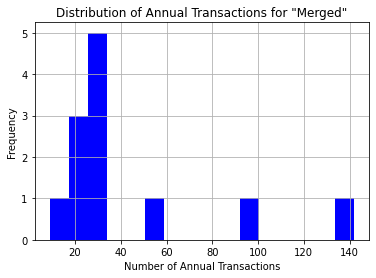

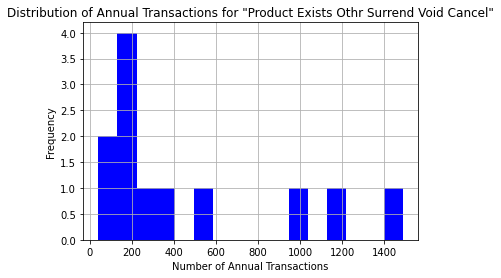

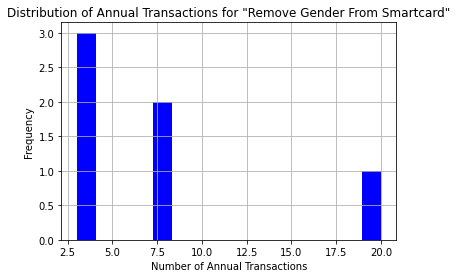

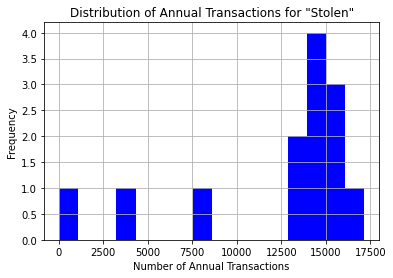

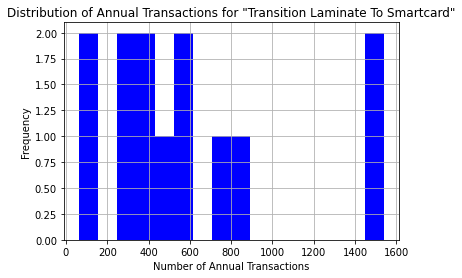

In [19]:
# Create a histogram for every action.reason
# Iterate through each row of the table using iterrows()
for index, row in the_table.iterrows():
    # Create a new figure and axis for each action reason
    fig, axes = plt.subplots()
    
    # Create a histogram using the values in the current row
    axes.hist(row, bins=16, color='blue')
    
    # Add a grid to the plot
    axes.grid(True)
    
    # Set the title, x-label, y-label of the plot
    axes.set_title(f'Distribution of Annual Transactions for "{index}"')
    axes.set_xlabel('Number of Annual Transactions')
    axes.set_ylabel('Frequency')
    
    # Display the plot for the current action reason
    plt.show()


**Observations and comments on the distributions:**

**Change Customer Details**:
Most years have transaction counts between 26,000 and 28,000, which shows a consistent and stable trend in this range for the "Change Customer Details" action/reason, which indicates that it consistently has a significant amount of annual transactions. We also see a peak frequency greater than 8 for that particular range. It seems to be one of the biggest reasons for smartcard transactions throughout the years.

**Condition Change**:
We can observe from the plot that the distribution is more spread out, although there is a notable frequency peak of 4 in the 40,000 and 42,000 range. This indicates that the total number of transactions each year kept changing, which is true when we see the steady increase in transactions from 2010-2021. It also seems to be one of the biggest reasons for smartcard transactions throughout the years.

**Court Order Issued X3 Or X4 Condition**:
The plot shows a consistent distribution between the range of 1000 and 2000, with a frequency peak of 3 in that range. This shows that this action/reason didn't really have any significant changes and stayed stable throughout the years. It seems to be a moderate reason for smartcard transactions throughout the years.

**Da/dgd Smartcard Replacement Fee Exempt**:
The plot shows a distribution that is heavily skewed between the range of 0 and 700 with a notable peak of 5 in that range. It indicates that this action/reason is stable and consistent within that range and hasn't had many major changes throughout the years. It also seems to be a small reason for smartcard transactions throughout the years.

**Damaged**:
Most years have transaction counts between 500 and 1600, with a peak of 3 within that range. This indicates that it wasn't a major reason for the total number of transactions since there are other reasons that've reached 20,000 transaction counts within the same year. It also seems to be a moderate reason for smartcard transactions throughout the years.

**Defective**:
The plot shows that annual transactions for this action/reason stayed between the range of 0-250, and it only has a peak of 1. It seems to be a very small reason of smartcard transactions throughout the years.

**Destroyed**:
The plot shows that annual transactions for this action/reason stayed between the range of 600-1400 for the most part, with a peak of 2 within the range. It also seems to be a moderate reason for smartcard transactions throughout the years.

**Disaster Relief**:
Most years have transaction counts between 0 and 120, with a peak of 4 within that range. It seems to be a very small reason of smartcard transactions throughout the years.

**Expired**:
Most years have transaction counts between 0 and 220, with a peak of 6 within that range. It also seems to be a very small reason of smartcard transactions throughout the years.

**Facial Image Is Not A True Likeness**:
The plot shows that annual transactions for this action/reason stayed between the range of 300-400 for the most part, with a peak of 5 within the range. It also seems to be a small reason for smartcard transactions throughout the years.

**Faulty**:
The plot shows that annual transactions for this action/reason stayed between the range of 0-500 for the most part, with a peak of 5 within the range. It also seems to be a small reason for smartcard transactions throughout the years.

**Lost**:
Most years have transaction counts between 50,000 and 70,000, which shows a consistent and stable trend in this range for the "Lost" action/reason, which indicates that it consistently has a significant amount of annual transactions. We also see a peak frequency of 3 for the particular range. It seems to be one of the biggest reasons for smartcard transactions throughout the years.

**Lost In Mail - Imu**:
Most years have transaction counts between 15,000 and 20,000, which indicates that it consistently has a significant amount of annual transactions. We also see a peak frequency of 4 for the particular range. It seems to be a big reason for smartcard transactions throughout the years.

**Managers Approval**:
The plot shows a consistent distribution between the range of 2200 and 4000, with a frequency peak of 4 in that range. This shows that this action/reason had some stability throughout the years but there were years where the number of transactions peaked to greater than 8000. It seems to be a moderately high reason for smartcard transactions throughout the years.

**Marine Licence Transition**:
The plot shows a distribution that is between the range of 50 and 250 with a peak of 2 in that range. It indicates that this action/reason is stable and consistent within that range and hasn't had many major changes throughout the years. It also seems to be a very small reason for smartcard transactions throughout the years.

**Merged**:
The plot shows a distribution that is heavily skewed between the range of 10 and 35 with a notable peak of 5 in that range. It indicates that this action/reason is stable within that range and hasn't had many major changes throughout the years. It also seems to be a very small reason for smartcard transactions throughout the years.

**Product Exists Othr Surrend Void Cancel**:
Most years have transaction counts between 40 and 400, with a peak of 4 within that range. It also seems to be a very small reason of smartcard transactions throughout the years.

**Remove Gender From Smartcard**:
Most years have transaction counts between 4 and 20, with a peak of 3 within that range. It also seems to be a very small reason of smartcard transactions throughout the years.

**Stolen**:
We can observe from the plot that the distribution is heavily skewed towards the 12500 - 17500 range, although there is a notable frequency peak of 4 in the range. It also seems to be a moderately high reason for smartcard transactions throughout the years.

**Transition Laminate To Smartcard**:
Most years have transaction counts between 100 and 600, with a peak of 2 within that range. It also seems to be a small reason of smartcard transactions throughout the years.